In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-12-23 15:48:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-12-23 15:48:17 (136 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [9]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=(max_sequence_len-1)))# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences=True)))# An LSTM Layer)
model.add(Dropout(0.2))# A dropout layer)
model.add(LSTM(20))# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))# A Dense Layer)
# Pick an optimizer
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['acc'])# Pick a loss function and an optimizer)
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 10, 64)            205504    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 10, 300)           258000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 20)                25680     
_________________________________________________________________
dense_4 (Dense)              (None, 1605)              33705     
_________________________________________________________________
dense_5 (Dense)              (None, 3211)              5156866   
Total params: 5,679,755
Trainable params: 5,679,755
Non-trainable params: 0
____________________________________________

In [11]:
 history = model.fit(predictors, label, epochs=200, verbose=1)

Train on 15462 samples
Epoch 1/200
15462/15462 [==============================] - 19s 1ms/sample - loss: 6.1992 - acc: 0.0360
Epoch 2/200
15462/15462 [==============================] - 19s 1ms/sample - loss: 6.1296 - acc: 0.0393
Epoch 3/200
15462/15462 [==============================] - 19s 1ms/sample - loss: 6.0694 - acc: 0.0417
Epoch 4/200
15462/15462 [==============================] - 19s 1ms/sample - loss: 6.0045 - acc: 0.0441
Epoch 5/200
15462/15462 [==============================] - 19s 1ms/sample - loss: 5.9371 - acc: 0.0486
Epoch 6/200
15462/15462 [==============================] - 19s 1ms/sample - loss: 5.8744 - acc: 0.0519
Epoch 7/200
15462/15462 [==============================] - 19s 1ms/sample - loss: 5.8124 - acc: 0.0548
Epoch 8/200
15462/15462 [==============================] - 19s 1ms/sample - loss: 5.7560 - acc: 0.0567
Epoch 9/200
15462/15462 [==============================] - 19s 1ms/sample - loss: 5.7007 - acc: 0.0592
Epoch 10/200
15462/15462 [========================

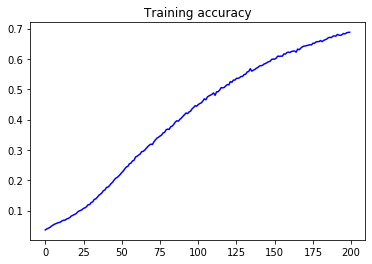

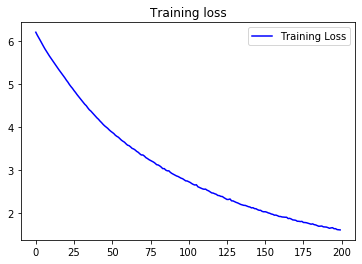

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [18]:
seed_text = "I am blinded by the lights"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
final_text = seed_text.split(' \' ')

for prose in final_text:
	print(prose)

I am blinded by the lights gold dispatch return'd that thee make mine eyes
to own quick more praise debate now loved me bear me men
to eyes in life swearing age or heart by end to be time will to in thee thee
to own own eye will
is my sweet eyes in new near contents are dead
'
of love to be not of me like my brow to heaven
' to muse art
' so for thy cheek is days
will not
to mayst own my love is best all be due to
